# Etude du marché du poulet mondiale
##  Analyse des données

### <a href='#T1'> 1 - Import </a>
### <a href='#T2'> 2 - Traitement des données </a>
### <a href='#T3'> 3 - Analyse des données </a>
- <a href='#T4'> 3.1 - Dendogramme </a><br>
- <a href='#T5'> 3.2 - K-Means Analysis </a><br>
- <a href='#T6'> 3.3 - ACP </a><br>
- <a href='#T7'> 3.4 Boxplot </a><br>
- <a href='#T8'> 3.5 Heatmap </a><br>

### <a href='#T9'> 4. - Pays selectionnees </a>

## <a name = 'T1'> 1 - Import libraries et fichiers </a>

In [1]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# import fichier
df = pd.read_csv('data_nettoyage')

In [3]:
# initialization seaborn
sns.set()

## <a name = 2> 2 - Traitement des données </a> 


In [4]:
# afficahge df
df.head(2)

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Production,Population,PIB/Habitant US $,Stabilité Politique
0,Afghanistan,5.0,0.54,57.0,29.0,28.0,10.499466,530.149831,-2.80
1,Afrique du Sud,143.0,14.11,2118.0,514.0,1667.0,10.950978,6723.928582,-0.28


In [5]:
# set index
df.set_index('Pays', inplace=True)

In [6]:
# creation variable features contenants les colonnes
features = df.columns

In [7]:
# création array X avec les valeurs du DF
X = df.values
names = df.index

## <a name = 'T3'> 3 - Analyse des données </a>

### <a name = 'T4'> 3.1 - Dendogramme </a>

In [8]:
# Centrage et réduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [9]:
# Clustering hierarchique avec méthode Ward
Z = linkage(X_scaled, 'ward')

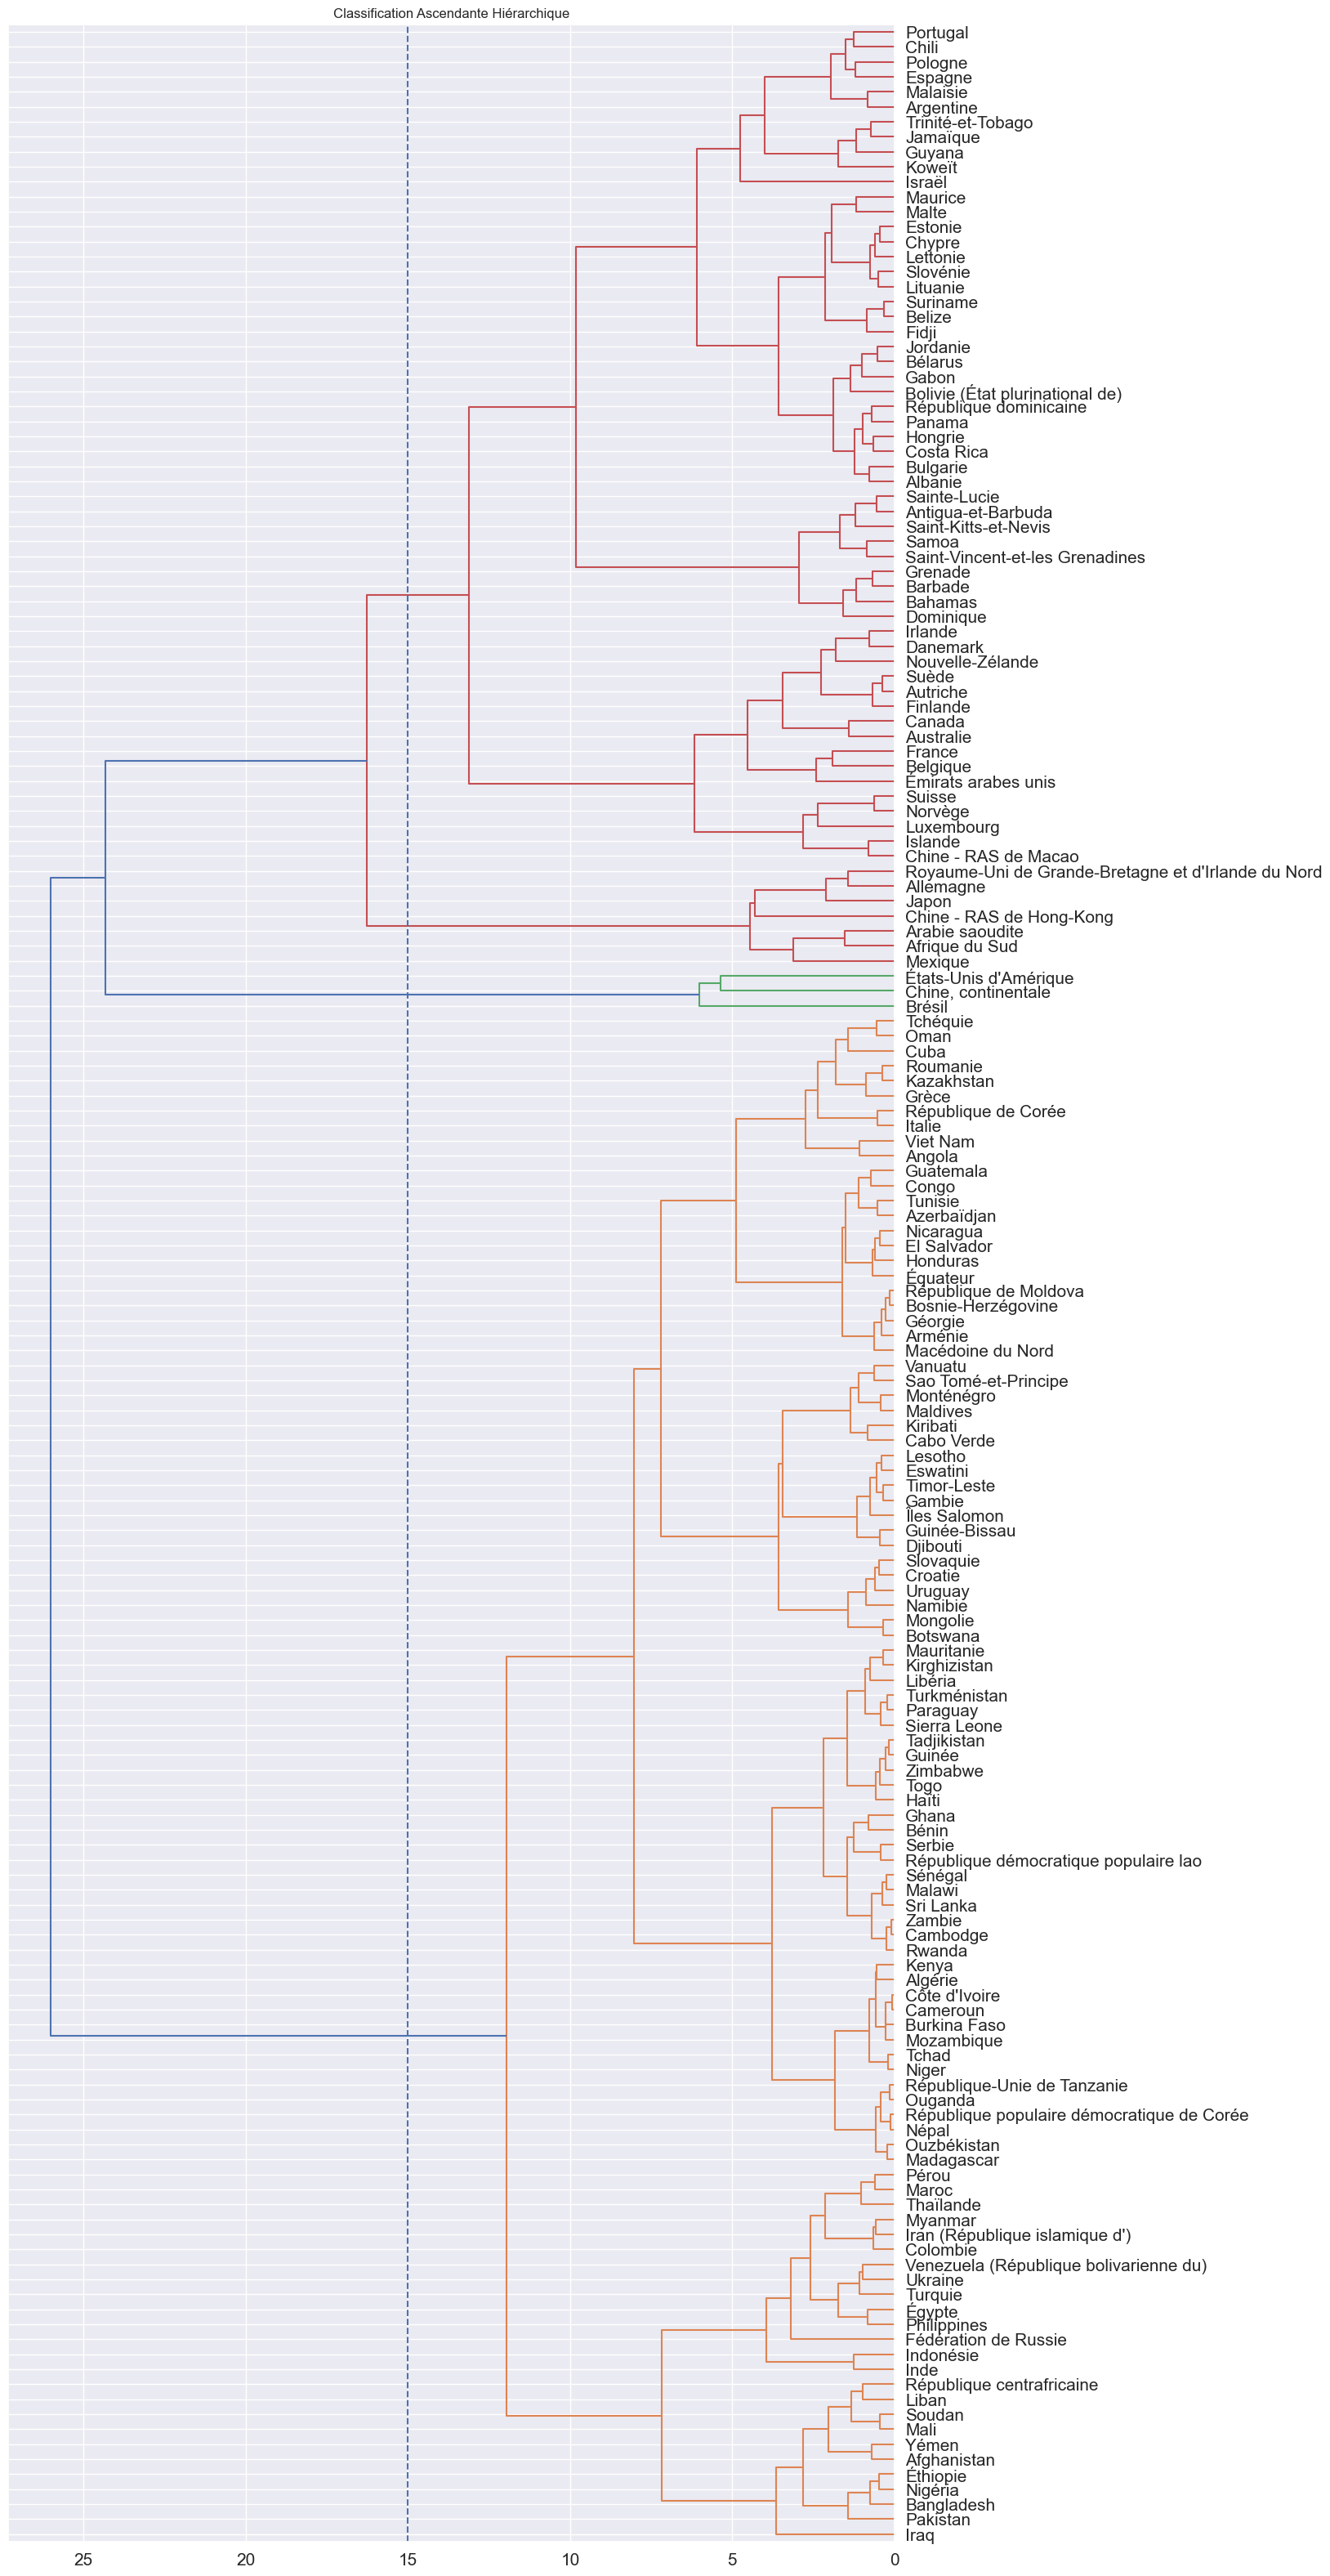

In [10]:
# affichage dendogramme
fig, ax = plt.subplots(1, 1, figsize=(14,40))
dendrogram(Z, orientation='left', labels=df.index)
plt.axvline(x=15, linestyle='dashed')
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
plt.title('Classification Ascendante Hiérarchique')
plt.show()

On peut maintenant déterminer le numéro des clusters dans le dendogramme en plaçant une ligne verticale.<br>
On trouve $4$ clusters.

In [11]:
# définition nombre de clusters
k=4

In [12]:
# definition des clusters
clusters = fcluster(Z,k,criterion='maxclust')

In [13]:
# creation dataframe pour visualiser les clusters par pays
df_cluster = df
df_cluster = pd.DataFrame({'pays' : df.index,'cluster':clusters})
df_cluster.head(3)

,pays,cluster
0,Afghanistan,1
1,Afrique du Sud,3
2,Albanie,4


In [14]:
# Affichage contenu clusters
for i in range(1, 5) : 
    # on fait une selection
    sub_df = df_cluster.loc[df_cluster.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les noms et les themes de chaque ligne
    names_list = sub_df.pays.values
   

    # on créé une liste de couple nom/theme
    ziped = zip(names_list) 
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)
    
    # supprimer parentheses et virgules
    txt = txt.replace('(','').replace(')','')
    txt = txt.replace(',','')
    
    # on print
    print(txt)
    print("\n\n")

cluster : 1
'Afghanistan' / 'Algérie' / 'Angola' / 'Arménie' / 'Azerbaïdjan' / 'Bangladesh' / 'Bosnie-Herzégovine' / 'Botswana' / 'Burkina Faso' / 'Bénin' / 'Cabo Verde' / 'Cambodge' / 'Cameroun' / 'Colombie' / 'Congo' / 'Croatie' / 'Cuba' / "Côte d'Ivoire" / 'Djibouti' / 'El Salvador' / 'Eswatini' / 'Fédération de Russie' / 'Gambie' / 'Ghana' / 'Grèce' / 'Guatemala' / 'Guinée' / 'Guinée-Bissau' / 'Géorgie' / 'Haïti' / 'Honduras' / 'Inde' / 'Indonésie' / "Iran République islamique d'" / 'Iraq' / 'Italie' / 'Kazakhstan' / 'Kenya' / 'Kirghizistan' / 'Kiribati' / 'Lesotho' / 'Liban' / 'Libéria' / 'Macédoine du Nord' / 'Madagascar' / 'Malawi' / 'Maldives' / 'Mali' / 'Maroc' / 'Mauritanie' / 'Mongolie' / 'Monténégro' / 'Mozambique' / 'Myanmar' / 'Namibie' / 'Nicaragua' / 'Niger' / 'Nigéria' / 'Népal' / 'Oman' / 'Ouganda' / 'Ouzbékistan' / 'Pakistan' / 'Paraguay' / 'Philippines' / 'Pérou' / 'Roumanie' / 'Rwanda' / 'République centrafricaine' / 'République de Corée' / 'République de Moldova' 

### <a name='T5'> 3.2 K-Means Analysis </a> 

In [15]:
# création liste vide inertia
inertia= []

In [16]:
# création liste des clusters a tester
k_list = range(1,10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
# methode pour calculer l'inertia 
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X) 
  inertia.append(kmeans.inertia_)

C:\Users\Zacca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


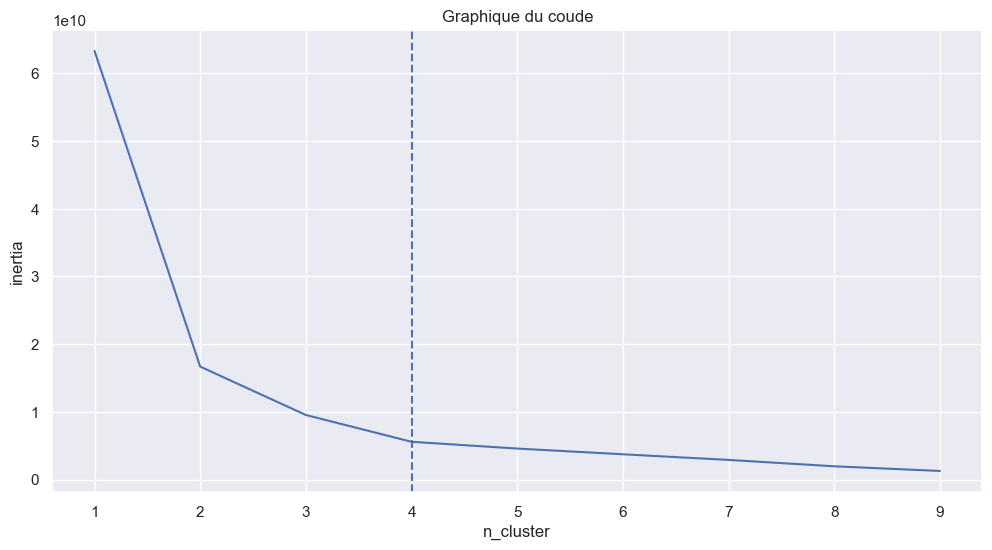

In [18]:
# affichage graphique du coude
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.title('Graphique du coude')
ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
plt.axvline(x=4, linestyle='dashed')
ax = plt.plot(k_list, inertia)

In [19]:
# definition clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [20]:
# conversion en DF pour afficher les données 
X = pd.DataFrame(X, columns=features)

In [21]:
# Renommer les clusters
clust = {i:j for i,j in enumerate(list("1234"))}
labels = [clust[i] for i in kmeans.labels_]

In [22]:
# creation variable
df_clust = df
df_clust['cluster'] = labels

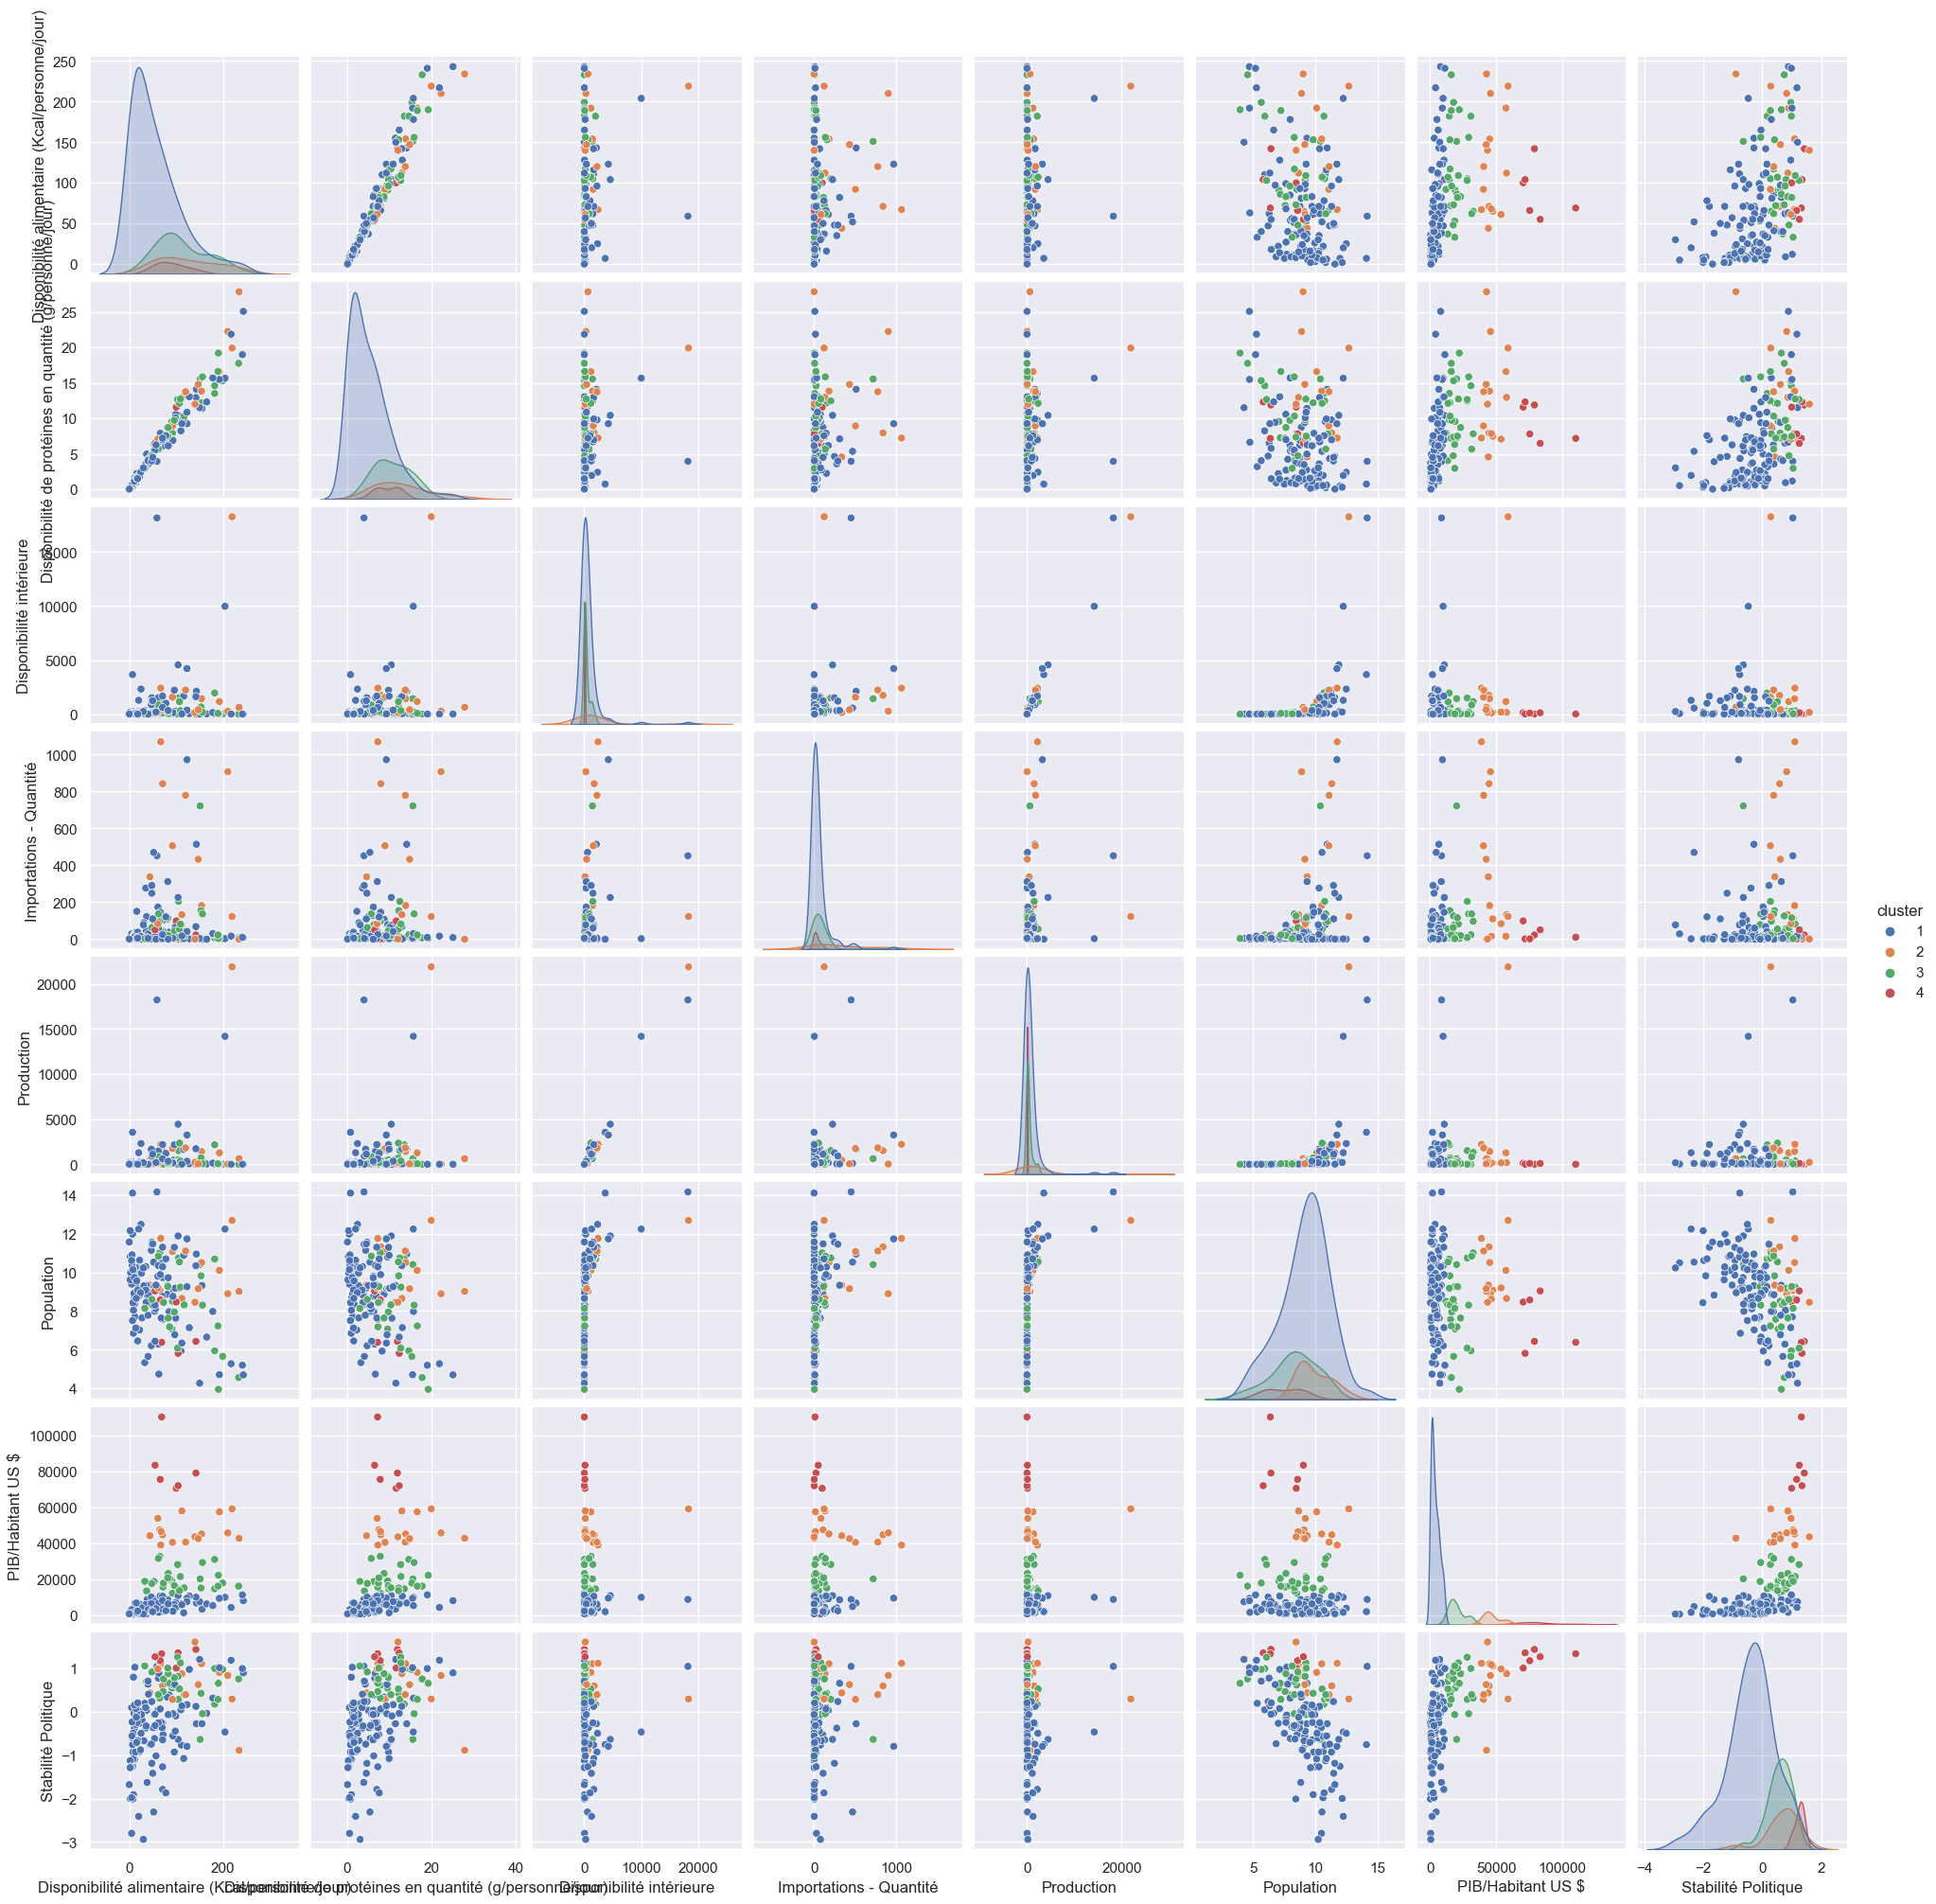

In [23]:
# création graphiques
sns.pairplot(df, hue="cluster")

<AxesSubplot:xlabel='PIB/Habitant US $', ylabel='Importations - Quantité'>

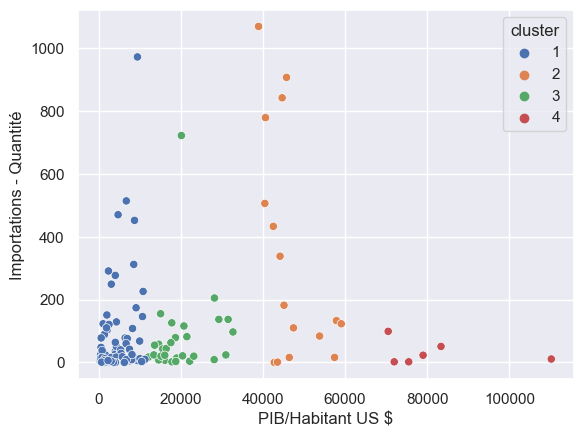

In [24]:
# affichage graphique
sns.scatterplot(data = df ,x='PIB/Habitant US $',y='Importations - Quantité',hue = 'cluster', )

In [25]:
centroids  = kmeans.cluster_centers_ 

In [26]:
df_centroids = pd.DataFrame(centroids, columns=features)

In [27]:
df_centroids

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Production,Population,PIB/Habitant US $,Stabilité Politique
0,55.897436,5.168376,626.102564,54.572650,634.119658,9.163964,3973.586448,-0.403504
1,124.750000,12.828125,1944.812500,346.187500,2117.937500,9.937739,46907.682639,0.701875
2,112.172414,10.615517,377.034483,79.827586,402.896552,8.294871,20050.732514,0.581034
3,89.333333,9.553333,67.166667,31.333333,52.500000,7.452253,81747.741976,1.256667


### <a name='T6'> 3.3 - ACP </a> 

In [28]:
# Definition variable X
X = df.values

In [29]:
df_centr = df.groupby('cluster').mean()

In [30]:
# controle des données pour vérifier qu'elles sont centre et reduite
idx = ['mean','std']
pd.DataFrame(X_scaled).describe().round(2).loc[idx,:]

,0,1,2,3,4,5,6,7
mean,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
# définition nombre des components
n_components = 7

In [32]:
# initialization components PCA
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=7)

In [33]:
# affichage variance pour chaque component 
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([37.29, 30.18, 12.59, 10.35,  6.23,  2.98,  0.28])

In [34]:
# affichage somme cumulée 
scree_cum = scree.cumsum().round()
scree_cum

array([ 37.,  67.,  80.,  90.,  97., 100., 100.])

In [35]:
# creation liste avec nombre des components
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

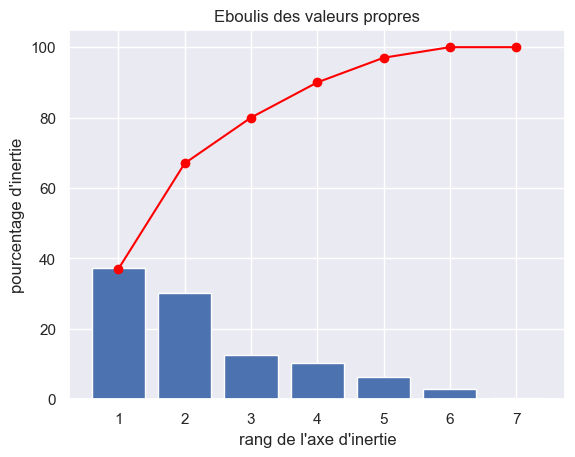

In [36]:
# affichage graphique des eboulis
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [37]:
# calcul des components
pcs = pca.components_

In [38]:
# conversion de l'array en dataframe
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Production,Population,PIB/Habitant US $,Stabilité Politique
F1,0.503315,0.510368,0.269469,0.218090,0.269296,-0.101419,0.379776,0.372808
F2,-0.127714,-0.140376,0.526764,0.223503,0.512375,0.537019,-0.091146,-0.278074
F3,-0.193228,-0.109052,-0.257194,0.732229,-0.321498,0.284083,0.399288,0.070477
F4,-0.420276,-0.403256,0.173628,-0.298785,0.195880,-0.089098,0.475880,0.518231
F5,-0.113634,-0.175506,0.155660,0.473945,0.094791,-0.387805,-0.596863,0.437959
F6,-0.123873,-0.092855,0.154671,0.219395,0.151914,-0.679800,0.317495,-0.563886
F7,-0.698475,0.711257,0.028510,-0.023949,0.012582,-0.012639,-0.065297,0.016680


<AxesSubplot:>

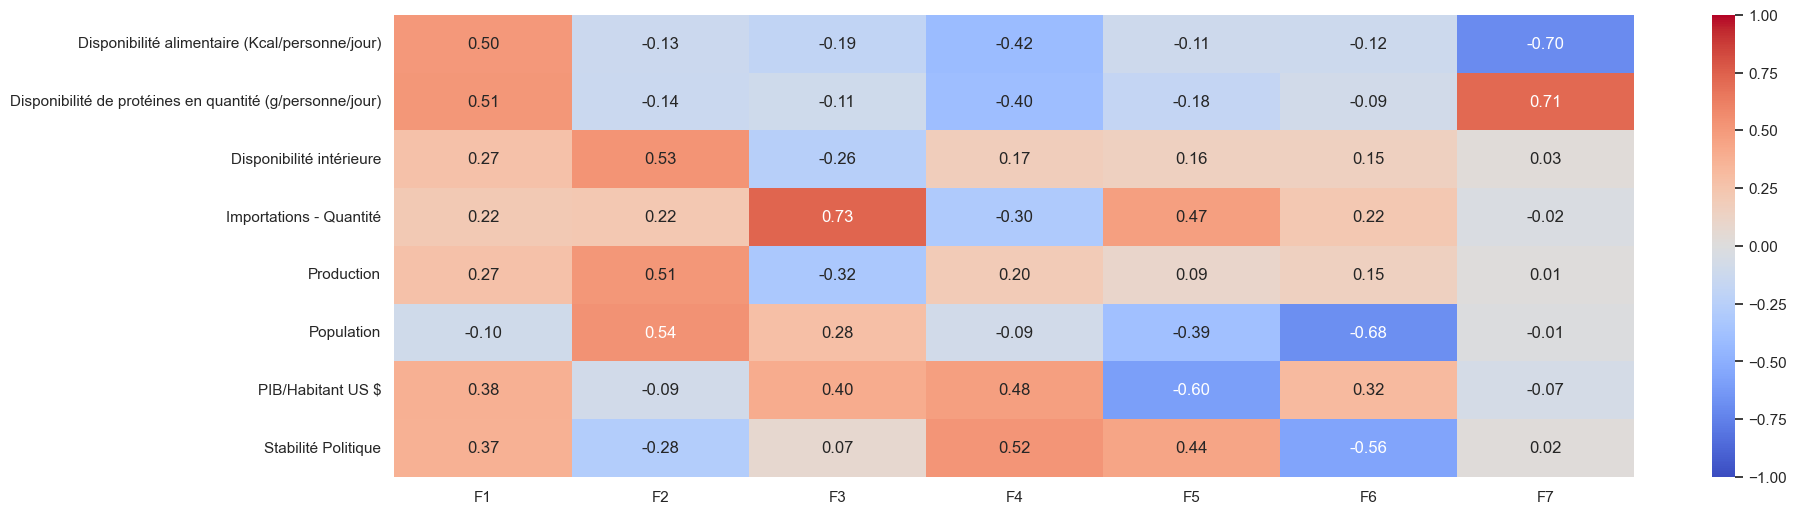

In [39]:
# creation d'une heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [40]:
# initialisation methode pour créer des graphiques pour la correlation
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    # Extrait x et y 
    x,y=x_y
    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))
    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):
        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )
        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))
    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [41]:
# initialisation methode pour l'affichage sur le plan factoriel
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    # Transforme X_projected en np.array
    X_ = np.array(X_projected)
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)
    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e
    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   
    # on définit x et y 
    x, y = x_y
    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')
    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1
    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)
    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 
    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


In [42]:
# definition variable pour effectuer la projection du graphique 
X_proj = pca.transform(X_scaled)

In [43]:
# variable avec centroid
XC = df_centr

In [44]:
# centrer et réduire 
std_scale = preprocessing.StandardScaler().fit(XC)
XC_scaled = std_scale.transform(XC)

In [45]:
# projection centroids dans le plan factoriel
XC_projected = pca.transform(XC_scaled)

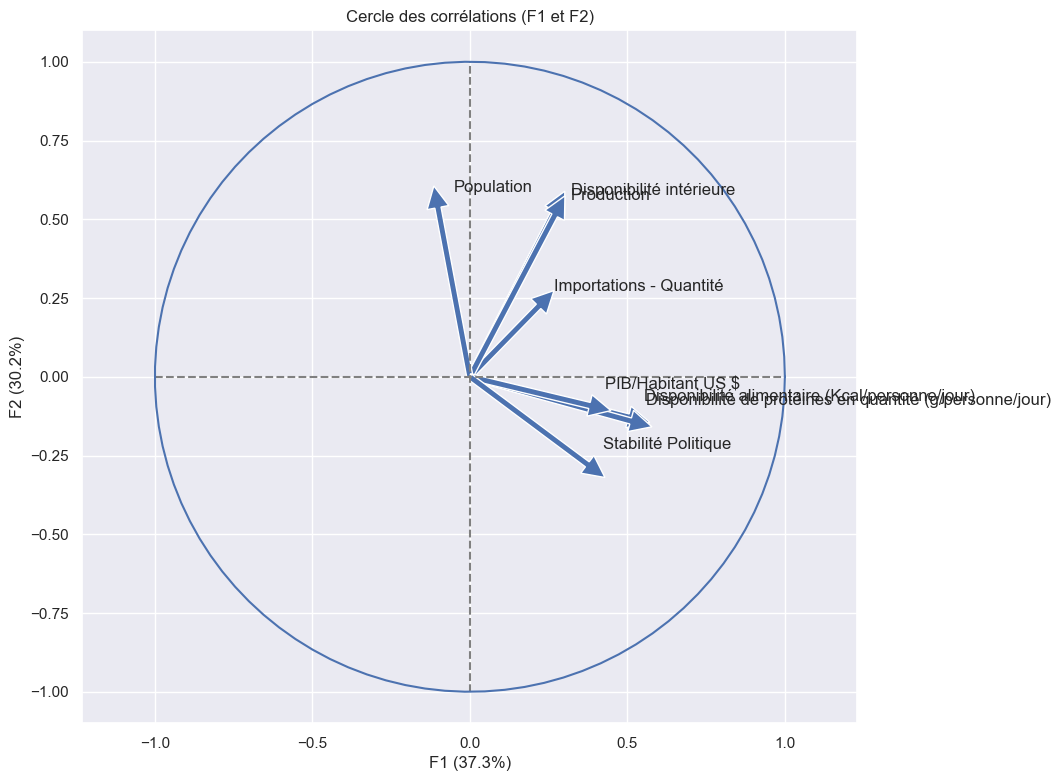

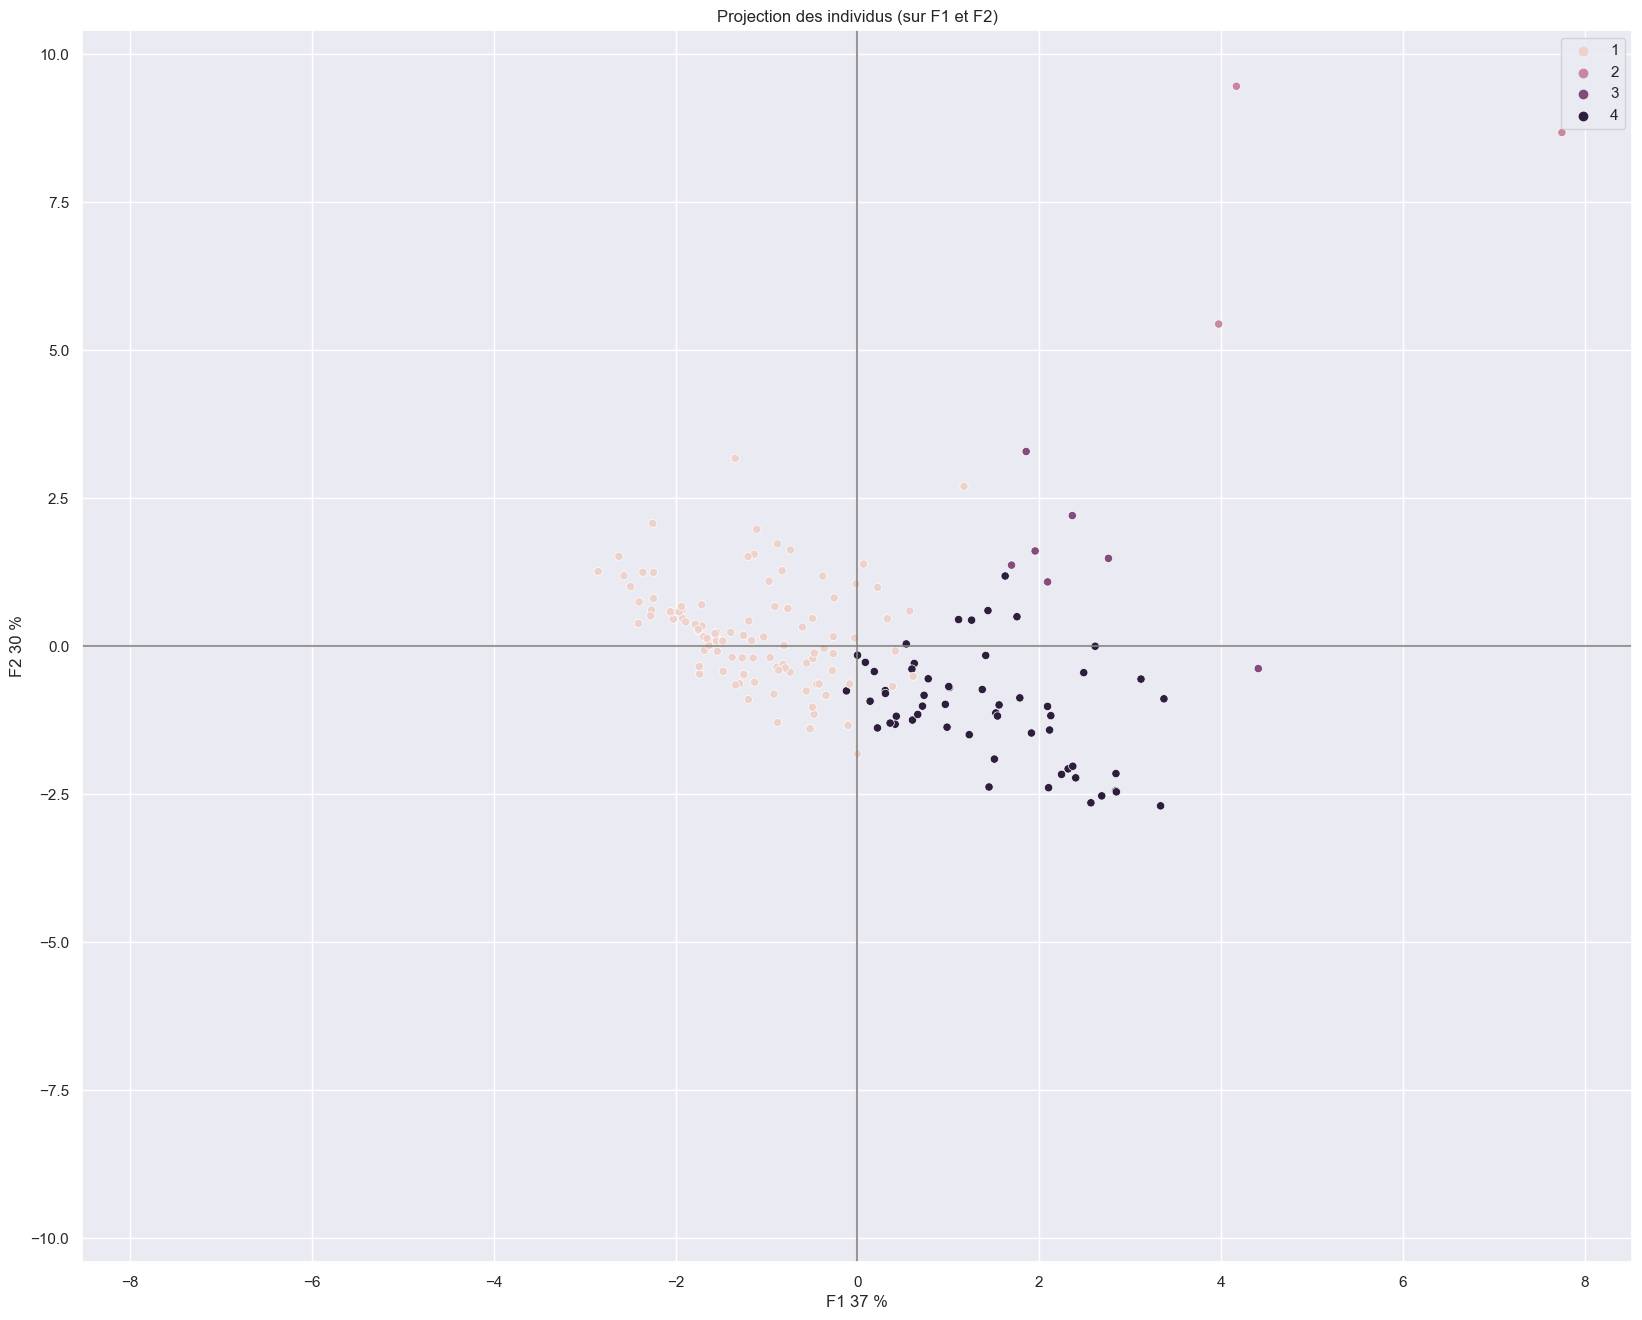

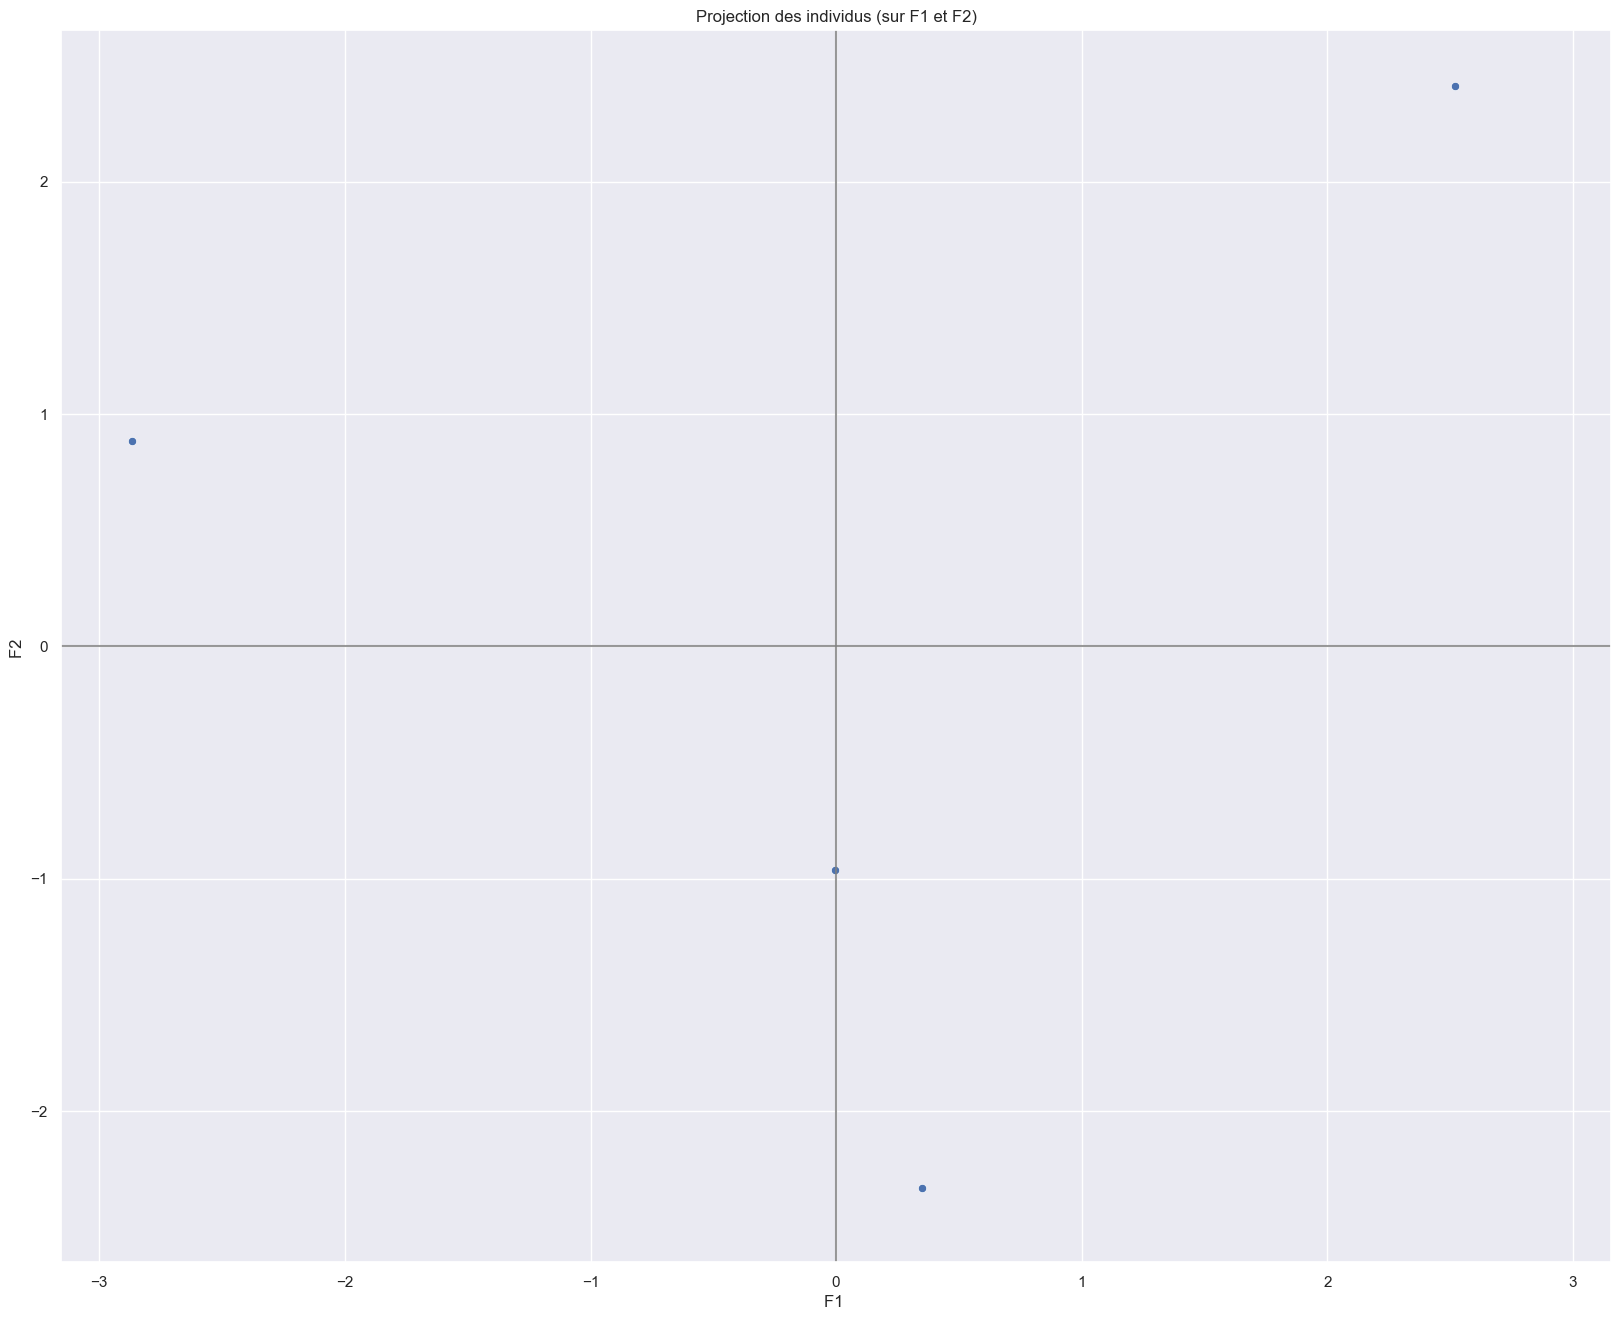

In [46]:
x_y = [0,1]
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16),  clusters=clusters )
#Projection des Centroides
display_factorial_planes(XC_projected, x_y,figsize=(20,16))


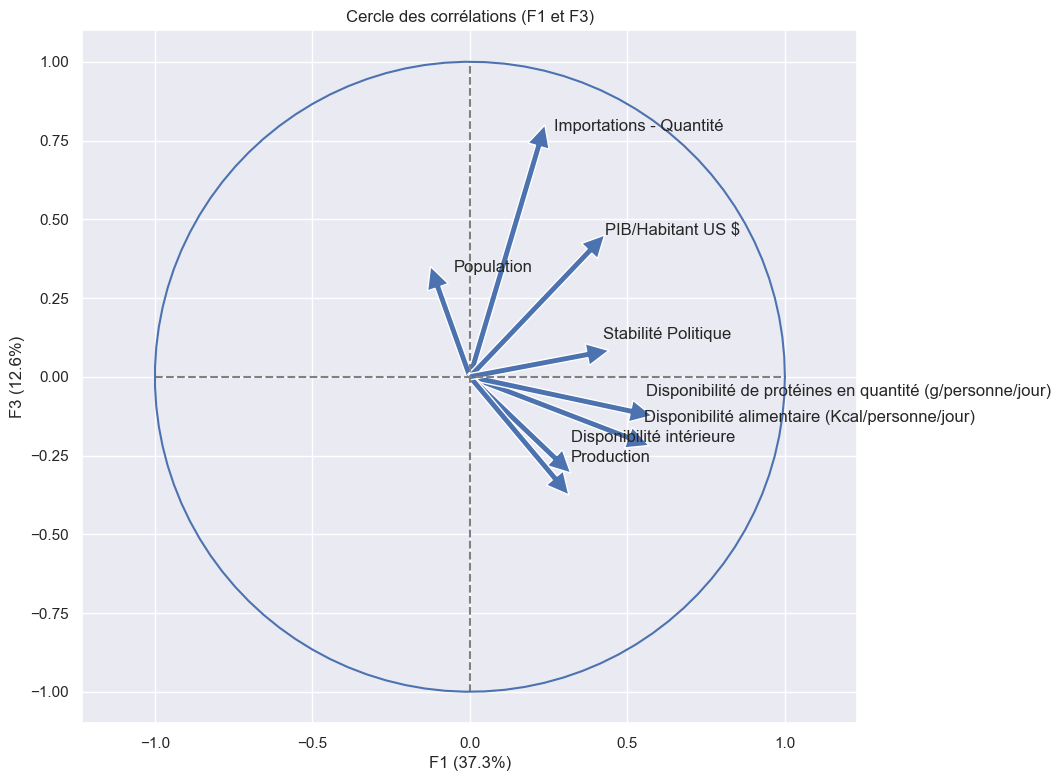

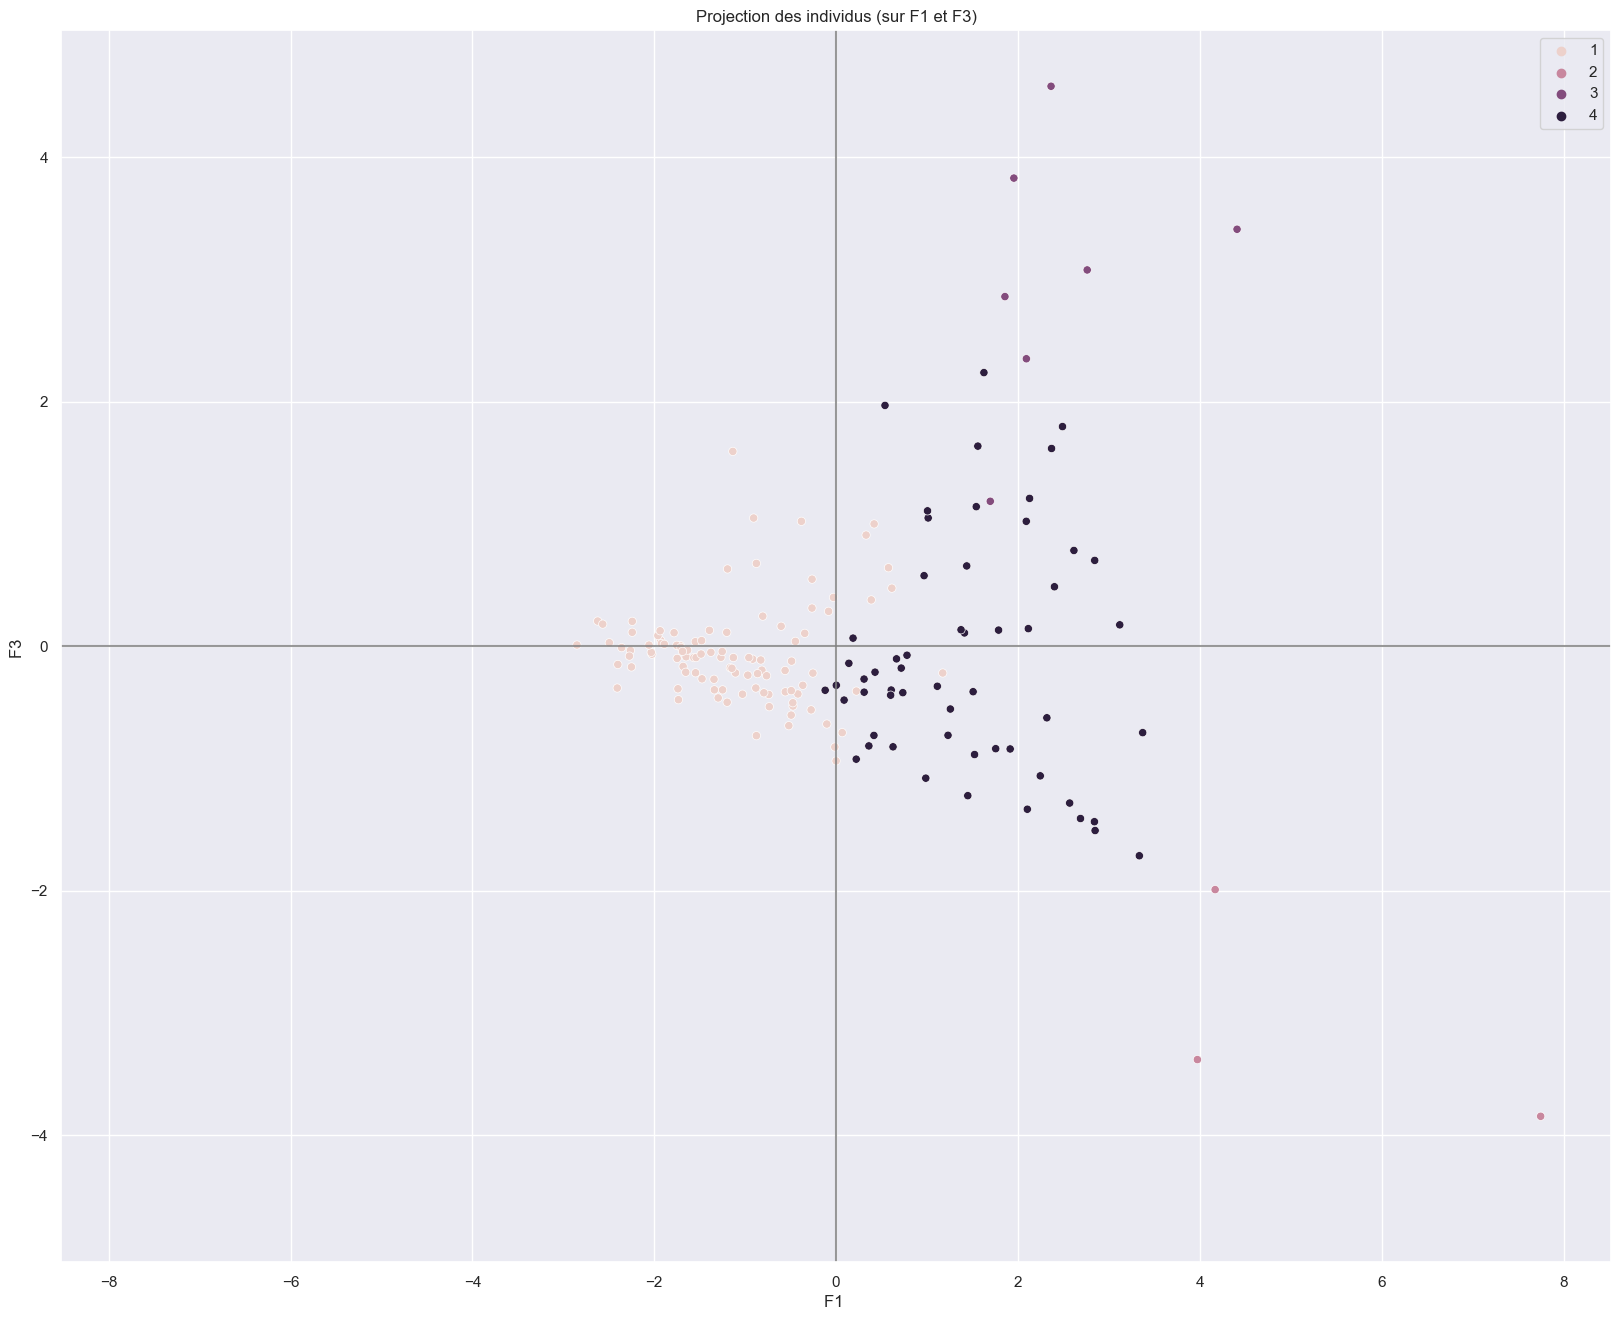

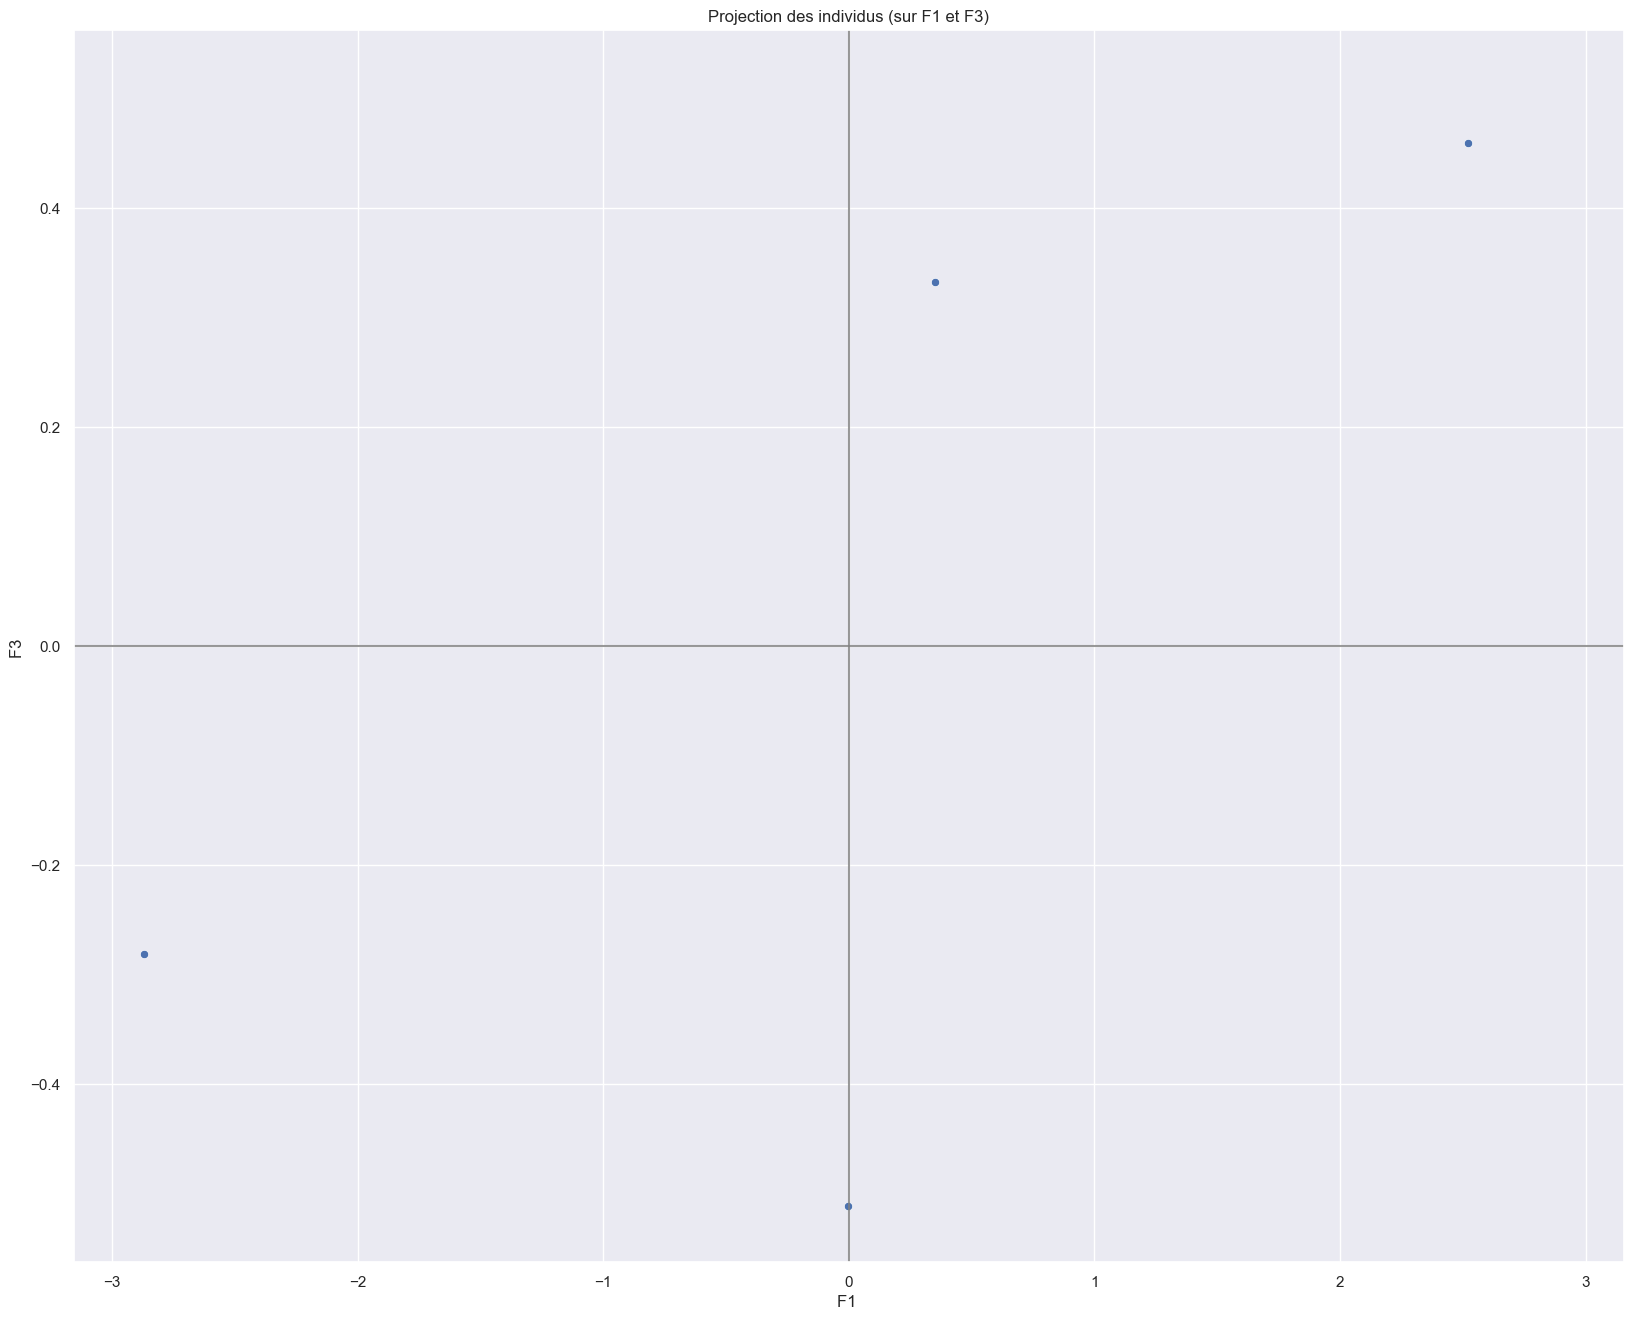

In [47]:
x_y = 0,2
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, alpha = 1,figsize=(20,16), clusters=clusters)
#Projection des Centroides
display_factorial_planes(XC_projected, x_y, figsize=(20,16))


In [48]:
df_centroids

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Production,Population,PIB/Habitant US $,Stabilité Politique
0,55.897436,5.168376,626.102564,54.572650,634.119658,9.163964,3973.586448,-0.403504
1,124.750000,12.828125,1944.812500,346.187500,2117.937500,9.937739,46907.682639,0.701875
2,112.172414,10.615517,377.034483,79.827586,402.896552,8.294871,20050.732514,0.581034
3,89.333333,9.553333,67.166667,31.333333,52.500000,7.452253,81747.741976,1.256667


### <a name = 'T7'> 3.4 - boxplot </a>

In [49]:
# préparation donnees
df_cluster_b = df
df_cluster_b['cluster'] = clusters
df_cluster_b.head(3)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Production,Population,PIB/Habitant US $,Stabilité Politique,cluster
Pays,,,,,,,,,
Afghanistan,5.0,0.54,57.0,29.0,28.0,10.499466,530.149831,-2.80,1
Afrique du Sud,143.0,14.11,2118.0,514.0,1667.0,10.950978,6723.928582,-0.28,3
Albanie,85.0,6.26,47.0,38.0,13.0,7.966992,4521.752219,0.38,4


<AxesSubplot:xlabel='cluster', ylabel='PIB/Habitant US $'>

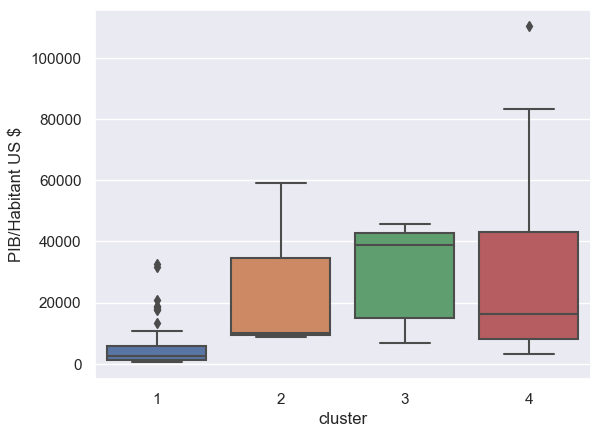

In [50]:
## affichage graphique
sns.boxplot(x=df_cluster_b['cluster'],y=df_cluster_b['PIB/Habitant US $'])


- **Cluster 1** = pays a faible niveaux de PIB/Habitant
- **Cluster 2** = Pays dispersée, avec un niveaux moyenne qui tend vers de valeurs de PIB plus faibles
- **Cluster 3** = Pays avec la mediane de PIB/Habitants plus importants
- **Cluster 4** = Pays avec un niveaux generale de PIB/Habitants important, mais mediane qui se concentre plutot vers le bas

<AxesSubplot:xlabel='cluster', ylabel='Importations - Quantité'>

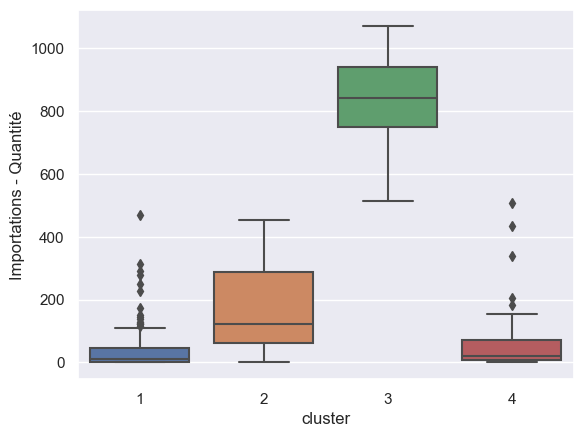

In [51]:
# affichage graphique
sns.boxplot(x=df_cluster_b['cluster'],y=df_cluster_b['Importations - Quantité'])

- **Cluster 1** = Pays pauvres qui importent une niveuax faible de poulet
- **Cluster 2** = Pays qui importent un niveuax modérée de poulets
- **Cluster 3** = Pays qui importent beacoup de poulet
- **Cluster 4** = Pays qui importent une niveaux très faible de poulet

<AxesSubplot:xlabel='cluster', ylabel='Stabilité Politique'>

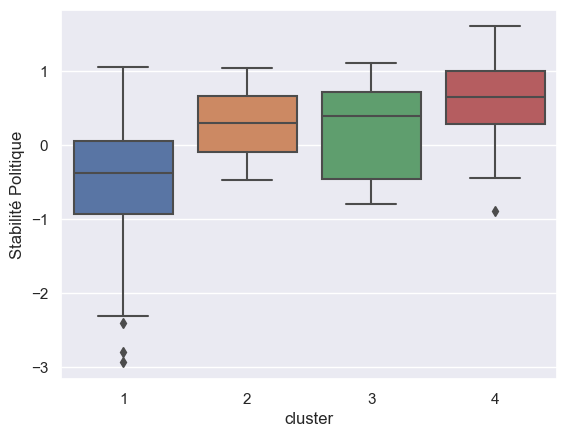

In [52]:
sns.boxplot(x=df_cluster_b['cluster'],y=df_cluster_b['Stabilité Politique'])

On observe en generale un niveaux de stabilité politique qui tend vers la postivite pour le clusters 2, 3 et 4.
Le cluster 1 présente la majorité des pays qui ont un niveaux negative de stabilité politique.

<AxesSubplot:xlabel='cluster', ylabel='Population'>

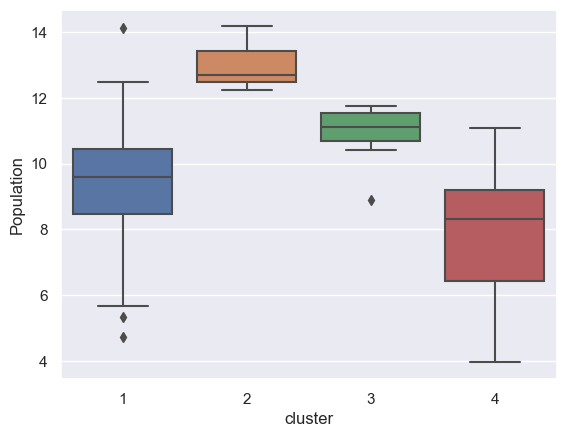

In [53]:
sns.boxplot(x=df_cluster_b['cluster'],y=df_cluster_b['Population'])

### <a name='T8'> 3.5 heatmap </a>

In [54]:
# preparation données 
df_avg = df_cluster_b.groupby('cluster').mean()

In [56]:
# réduction et centrage
std_scale = preprocessing.StandardScaler().fit(df_avg)
XH_scaled = std_scale.transform(df_avg)

In [57]:
# creation df pour heatmap
df_heatmap = pd.DataFrame(XH_scaled, columns = features, index=df_avg.index)

<AxesSubplot:ylabel='cluster'>

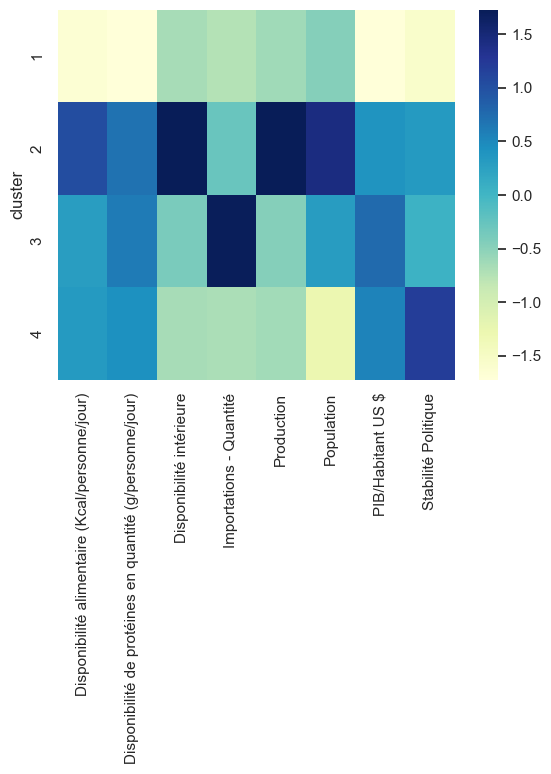

In [59]:
# afficahge heatmap
sns.heatmap(df_heatmap, cmap="YlGnBu")

## <a name='T9'> 4. Pays sélectionnées </a>

In [60]:
# affichage cluster
df[df['cluster'] == 3]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Production,Population,PIB/Habitant US $,Stabilité Politique,cluster
Pays,,,,,,,,,
Afrique du Sud,143.0,14.11,2118.0,514.0,1667.0,10.950978,6723.928582,-0.28,3
Allemagne,71.0,7.96,1739.0,842.0,1514.0,11.322472,44670.222288,0.59,3
Arabie saoudite,151.0,15.57,1435.0,722.0,616.0,10.407324,20138.146332,-0.64,3
Chine - RAS de Hong-Kong,210.0,22.26,280.0,907.0,24.0,8.896495,45737.483212,0.83,3
Japon,67.0,7.24,2415.0,1069.0,2215.0,11.755893,38928.952602,1.11,3
Mexique,123.0,9.26,4219.0,972.0,3249.0,11.734286,9434.378177,-0.80,3
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,120.0,13.77,2234.0,779.0,1814.0,11.108372,40617.679075,0.39,3
